In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
!wget https: // raw.githubusercontent.com / quangdaist123 / PhoNER_COVID19_Error_Analysis / main / Output / df_error_types_phobert_gold_summary.csv

--2021-12-25 04:43:04--  https://raw.githubusercontent.com/quangdaist123/PhoNER_COVID19_Error_Analysis/main/Output/df_error_types_phobert_gold_summary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410 [text/plain]
Saving to: ‘df_error_types_phobert_gold_summary.csv’

df_error_types_phob 100%[===================>]     410  --.-KB/s    in 0s      

2021-12-25 04:43:04 (17.0 MB/s) - ‘df_error_types_phobert_gold_summary.csv’ saved [410/410]



In [ ]:
!wget https: // raw.githubusercontent.com / quangdaist123 / PhoNER_COVID19_Error_Analysis / main / Output / df_error_types_bilstm_gold_summary.csv

--2021-12-25 04:43:06--  https://raw.githubusercontent.com/quangdaist123/PhoNER_COVID19_Error_Analysis/main/Output/df_error_types_bilstm_gold_summary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 423 [text/plain]
Saving to: ‘df_error_types_bilstm_gold_summary.csv’

df_error_types_bils 100%[===================>]     423  --.-KB/s    in 0s      

2021-12-25 04:43:06 (31.9 MB/s) - ‘df_error_types_bilstm_gold_summary.csv’ saved [423/423]



#PhoBERT

In [ ]:
df_final = pd.read_csv("/content/df_error_types_phobert_gold_summary.csv")

colors_error_types = {'Wrong Range': 'C0',
                      'No Extraction': 'C1',
                      'Wrong Tag': 'C2',
                      'Wrong Range and tag': 'C3',
                      'No Annotation': 'C4'
                      }

colors = {
        'DATE': '#EA2F86',  # https://www.schemecolor.com/bright-rainbow-gradient.php
        'GENDER': '#F09C0A',
        'JOB': '#FAE000',
        'LOCATION': '#93E223',
        'NAME': '#4070D3',
        'AGE': '#9925be',
        'O': '#7B7D70',  # màu gray ở https://www.schemecolor.com/rural-stay.php
        'ORGANIZATION': '#493C9E',
        'PATIENT_ID': '#ED3D07',  # màu đỏ https://www.schemecolor.com/bright-summer-beach.php
        'SYMPTOM_AND_DISEASE': '#F2E8D8',  # https://www.schemecolor.com/pastels-for-men.php
        'TRANSPORTATION': '#C4A69B'}


##Tổng hợp

In [ ]:
df_all = df_final.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
df_all

,Tag,Total,Errors,No Extraction,No Annotation,Wrong Range,Wrong Tag,Wrong Range and tag


In [ ]:
name = pd.Series(["No Extraction", "Wrong Range", "No Annotation", "Wrong Tag", "Wrong Range and tag"])
value = pd.Series([494, 281, 181, 125, 53])

In [ ]:
labels = [f'{l}, {s * 100 / (1134):0.1f}%' for l, s in zip(name, value)]

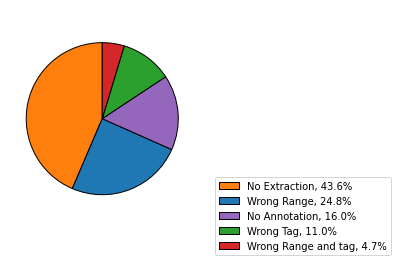

In [ ]:
import matplotlib.patches

label = name.values.tolist()
plt.gca().axis("equal")
pie = plt.pie([494, 281, 181, 125, 53], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors_error_types[key] for key in label])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('all_error_Bi.png', bbox_inches='tight', dpi=300)

In [ ]:
df_final

,Tag,Total,Errors,No Extraction,No Annotation,Wrong Range,Wrong Tag,Wrong Range and tag
0,PATIENT_ID,2005,32,6,11,21,4,1
1,NAME,318,15,12,10,2,1,0
2,AGE,582,12,5,12,1,4,2
3,GENDER,462,10,9,9,0,1,0
4,JOB,173,32,18,32,12,2,0
5,LOCATION,4441,186,30,35,110,41,5
6,ORGANIZATION,771,70,11,35,14,39,6
7,SYMPTOM_AND_DISEASE,1136,146,76,37,69,1,0
8,TRANSPORTATION,193,1,0,0,0,1,0
9,DATE,1654,12,2,14,6,4,0


##No Annotation

In [ ]:
df_noan = df_final[["Tag", "No Annotation"]]
df_noan

,Tag,No Annotation
0,PATIENT_ID,11
1,NAME,10
2,AGE,12
3,GENDER,9
4,JOB,32
5,LOCATION,35
6,ORGANIZATION,35
7,SYMPTOM_AND_DISEASE,37
8,TRANSPORTATION,0
9,DATE,14


In [ ]:
df_noan.sort_values("No Annotation", ascending=False, inplace=True, ignore_index=True)
no_an_sum = df_noan.iloc[0, -1]
df_noan.drop(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
labels = [f'{l}, {s * 100 / (no_an_sum):0.1f}%' for l, s in zip(df_noan["Tag"], df_noan["No Annotation"])]

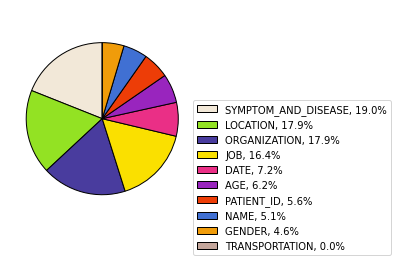

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")

temp_labels = df_noan['Tag'].values.tolist()
pie = plt.pie(df_noan["No Annotation"], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('no_annotation_BI.png', bbox_inches='tight', dpi=300)

##No Extraction

In [ ]:
df_noex = df_final[["Tag", "No Extraction"]]
df_noex

,Tag,No Extraction
0,PATIENT_ID,6
1,NAME,12
2,AGE,5
3,GENDER,9
4,JOB,18
5,LOCATION,30
6,ORGANIZATION,11
7,SYMPTOM_AND_DISEASE,76
8,TRANSPORTATION,0
9,DATE,2


In [ ]:
df_noex.sort_values("No Extraction", ascending=False, inplace=True, ignore_index=True)
no_ex_sum = df_noex.iloc[0, -1]
df_noex.drop(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
labels = [f'{l}, {s * 100 / (no_ex_sum):0.1f}%' for l, s in zip(df_noex["Tag"], df_noex["No Extraction"])]

In [ ]:
labels

['SYMPTOM_AND_DISEASE, 45.0%',
 'LOCATION, 17.8%',
 'JOB, 10.7%',
 'NAME, 7.1%',
 'ORGANIZATION, 6.5%',
 'GENDER, 5.3%',
 'PATIENT_ID, 3.6%',
 'AGE, 3.0%',
 'DATE, 1.2%',
 'TRANSPORTATION, 0.0%']

In [ ]:
df_noex

,Tag,No Extraction
1,SYMPTOM_AND_DISEASE,76
2,LOCATION,30
3,JOB,18
4,NAME,12
5,ORGANIZATION,11
6,GENDER,9
7,PATIENT_ID,6
8,AGE,5
9,DATE,2
10,TRANSPORTATION,0


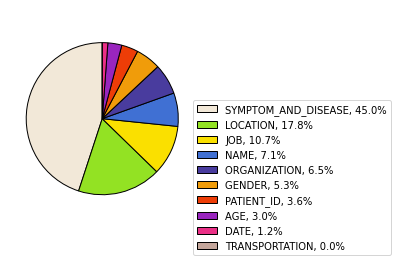

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")

temp_labels = df_noex['Tag'].values.tolist()
pie = plt.pie(df_noex["No Extraction"], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('no_extraction.png', bbox_inches='tight', dpi=300)

##Wrong Tag

In [ ]:
df_wrongtag = df_final[["Tag", "Wrong Tag"]]
df_wrongtag

,Tag,Wrong Tag
0,PATIENT_ID,4
1,NAME,1
2,AGE,4
3,GENDER,1
4,JOB,2
5,LOCATION,41
6,ORGANIZATION,39
7,SYMPTOM_AND_DISEASE,1
8,TRANSPORTATION,1
9,DATE,4


In [ ]:
df_wrongtag.sort_values("Wrong Tag", ascending=False, inplace=True, ignore_index=True)
wrongtag_sum = df_wrongtag.iloc[0, -1]
df_wrongtag.drop(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_wrongtag

,Tag,Wrong Tag
1,LOCATION,41
2,ORGANIZATION,39
3,PATIENT_ID,4
4,AGE,4
5,DATE,4
6,JOB,2
7,NAME,1
8,GENDER,1
9,SYMPTOM_AND_DISEASE,1
10,TRANSPORTATION,1


In [ ]:
labels = [f'{l}, {s * 100 / (wrongtag_sum):0.1f}%' for l, s in zip(df_wrongtag["Tag"], df_wrongtag["Wrong Tag"])]

In [ ]:
labels

['LOCATION, 41.8%',
 'ORGANIZATION, 39.8%',
 'PATIENT_ID, 4.1%',
 'AGE, 4.1%',
 'DATE, 4.1%',
 'JOB, 2.0%',
 'NAME, 1.0%',
 'GENDER, 1.0%',
 'SYMPTOM_AND_DISEASE, 1.0%',
 'TRANSPORTATION, 1.0%']

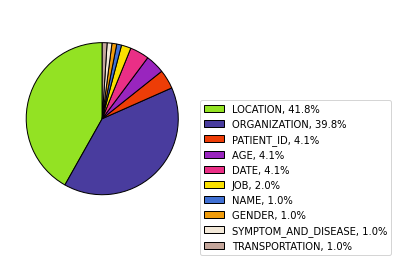

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")

temp_labels = df_wrongtag['Tag'].values.tolist()
pie = plt.pie(df_wrongtag.iloc[:, -1], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('wrongtag.png', bbox_inches='tight', dpi=300)

##Wrong Range

In [ ]:
df_wrongrange = df_final[["Tag", "Wrong Range"]]
df_wrongrange

,Tag,Wrong Range
0,PATIENT_ID,21
1,NAME,2
2,AGE,1
3,GENDER,0
4,JOB,12
5,LOCATION,110
6,ORGANIZATION,14
7,SYMPTOM_AND_DISEASE,69
8,TRANSPORTATION,0
9,DATE,6


In [ ]:
df_wrongrange.sort_values("Wrong Range", ascending=False, inplace=True, ignore_index=True)
wrongrange_sum = df_wrongrange.iloc[0, -1]
df_wrongrange.drop(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_wrongrange

,Tag,Wrong Range
1,LOCATION,110
2,SYMPTOM_AND_DISEASE,69
3,PATIENT_ID,21
4,ORGANIZATION,14
5,JOB,12
6,DATE,6
7,NAME,2
8,AGE,1
9,GENDER,0
10,TRANSPORTATION,0


In [ ]:
labels = [f'{l}, {s * 100 / (wrongrange_sum):0.1f}%' for l, s in zip(df_wrongrange["Tag"], df_wrongrange["Wrong Range"])]

In [ ]:
labels

['LOCATION, 46.8%',
 'SYMPTOM_AND_DISEASE, 29.4%',
 'PATIENT_ID, 8.9%',
 'ORGANIZATION, 6.0%',
 'JOB, 5.1%',
 'DATE, 2.6%',
 'NAME, 0.9%',
 'AGE, 0.4%',
 'GENDER, 0.0%',
 'TRANSPORTATION, 0.0%']

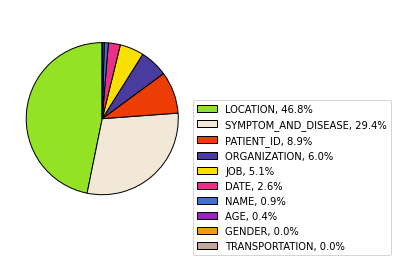

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")
temp_labels = df_wrongrange['Tag'].values.tolist()
pie = plt.pie(df_wrongrange.iloc[:, -1], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('wrongrange.png', bbox_inches='tight', dpi=300)

##Wrong Range and tag

In [ ]:
df_wrongrange_tag = df_final[["Tag", "Wrong Range and tag"]]
df_wrongrange_tag

,Tag,Wrong Range and tag
0,PATIENT_ID,1
1,NAME,0
2,AGE,2
3,GENDER,0
4,JOB,0
5,LOCATION,5
6,ORGANIZATION,6
7,SYMPTOM_AND_DISEASE,0
8,TRANSPORTATION,0
9,DATE,0


In [ ]:
df_wrongrange_tag.sort_values("Wrong Range and tag", ascending=False, inplace=True, ignore_index=True)
wrongrange_tag_sum = df_wrongrange_tag.iloc[0, -1]
df_wrongrange_tag.drop(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_wrongrange_tag

,Tag,Wrong Range and tag
1,ORGANIZATION,6
2,LOCATION,5
3,AGE,2
4,PATIENT_ID,1
5,NAME,0
6,GENDER,0
7,JOB,0
8,SYMPTOM_AND_DISEASE,0
9,TRANSPORTATION,0
10,DATE,0


In [ ]:
labels = [f'{l}, {s * 100 / (wrongrange_tag_sum):0.1f}%' for l, s in zip(df_wrongrange_tag["Tag"], df_wrongrange_tag["Wrong Range and tag"])]

In [ ]:
labels

['ORGANIZATION, 42.9%',
 'LOCATION, 35.7%',
 'AGE, 14.3%',
 'PATIENT_ID, 7.1%',
 'NAME, 0.0%',
 'GENDER, 0.0%',
 'JOB, 0.0%',
 'SYMPTOM_AND_DISEASE, 0.0%',
 'TRANSPORTATION, 0.0%',
 'DATE, 0.0%']

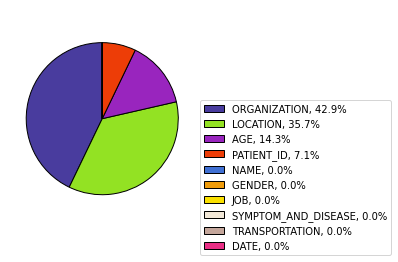

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")
temp_labels = df_wrongrange_tag['Tag'].values.tolist()
pie = plt.pie(df_wrongrange_tag.iloc[:, -1], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('wrongrange_tag.png', bbox_inches='tight', dpi=300)

#BiLSTM

In [ ]:
df_final_bi = pd.read_csv("/content/df_error_types_bilstm_gold_summary.csv")

colors_error_types = {'No Extraction': 'C0',
                      'No Annotation': 'C1',
                      'Wrong Range': 'C2',
                      'Wrong Tag': 'C3',
                      'Wrong Range and tag': 'C4'}

colors = {
        'DATE': '#EA2F86',  # https://www.schemecolor.com/bright-rainbow-gradient.php
        'GENDER': '#F09C0A',
        'JOB': '#FAE000',
        'LOCATION': '#93E223',
        'NAME': '#4070D3',
        'AGE': '#9925be',
        'O': '#7B7D70',  # màu gray ở https://www.schemecolor.com/rural-stay.php
        'ORGANIZATION': '#493C9E',
        'PATIENT_ID': '#ED3D07',  # màu đỏ https://www.schemecolor.com/bright-summer-beach.php
        'SYMPTOM_AND_DISEASE': '#F2E8D8',  # https://www.schemecolor.com/pastels-for-men.php
        'TRANSPORTATION': '#C4A69B'}


In [ ]:
df_final_bi

,Tag,Total,Errors,No Extraction,No Annotation,Wrong Range,Wrong Tag,Wrong Range and tag
0,PATIENT_ID,2005,40,12,23,20,7,1
1,NAME,318,55,47,5,4,2,2
2,AGE,582,29,25,10,1,1,2
3,GENDER,462,20,19,19,0,1,0
4,JOB,173,73,59,25,11,1,2
5,LOCATION,4441,316,120,34,137,45,14
6,ORGANIZATION,771,131,35,15,27,47,22
7,SYMPTOM_AND_DISEASE,1136,234,155,33,76,1,2
8,TRANSPORTATION,193,28,8,0,1,13,6
9,DATE,1654,27,14,17,4,7,2


##Tổng hợp

In [ ]:
df_all = df_final_bi.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df_all

,Tag,Total,Errors,No Extraction,No Annotation,Wrong Range,Wrong Tag,Wrong Range and tag
10,Total,11735,1134,494,181,281,125,53


In [ ]:
name = pd.Series(["Wrong Range", 'No Annotation', "No Extraction", "Wrong Tag", "Wrong Range and tag"])
value = df_all.loc[:, name].iloc[0, :]
value

Wrong Range            281
No Annotation          181
No Extraction          494
Wrong Tag              125
Wrong Range and tag     53
Name: 10, dtype: int64

In [ ]:
labels_withPct = [f'{l}, {float(s) * 100 / (sum(value)):0.1f}%' for l, s in zip(name, value)]
labels_withPct

In [ ]:
import matplotlib.patches

labels = name.values.tolist()
plt.gca().axis("equal")
pie = plt.pie(list(value), startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"},
              colors=[colors_error_types[key] for key in labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels_withPct, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('all_error.png', bbox_inches='tight', dpi=300, transparent=True)

##No Extraction

In [ ]:
df_noex = df_final_bi[["Tag", "No Extraction"]]
df_noex

In [ ]:
df_noex.sort_values("No Extraction", ascending=False, inplace=True, ignore_index=True)
no_ex_sum = df_noex.iloc[0, -1]
df_noex.drop(0, inplace=True)

In [ ]:
labelsWithPct = [f'{l}, {s * 100 / (no_ex_sum):0.1f}%' for l, s in zip(df_noex["Tag"], df_noex["No Extraction"])]
labelsWithPct

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")

temp_labels = df_noex['Tag'].values.tolist()
pie = plt.pie(df_noex["No Extraction"], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labelsWithPct, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('no_extract.png', bbox_inches='tight', dpi=300)

##Wrong Tag

In [ ]:
df_wrongtag = df_final_bi[["Tag", "Wrong Tag"]]
df_wrongtag

In [ ]:
df_wrongtag.sort_values("Wrong Tag", ascending=False, inplace=True, ignore_index=True)
wrongtag_sum = df_wrongtag.iloc[0, -1]
df_wrongtag.drop(0, inplace=True)

In [ ]:
df_wrongtag

In [ ]:
labels = [f'{l}, {s * 100 / (wrongtag_sum):0.1f}%' for l, s in zip(df_wrongtag["Tag"], df_wrongtag["Wrong Tag"])]

In [ ]:
labels

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")

temp_labels = df_wrongtag['Tag'].values.tolist()
pie = plt.pie(df_wrongtag.iloc[:, -1], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('wrongtag.png', bbox_inches='tight', dpi=300)

##Wrong Range

In [ ]:
df_wrongrange = df_final_bi[["Tag", "Wrong Range"]]
df_wrongrange

In [ ]:
df_wrongrange.sort_values("Wrong Range", ascending=False, inplace=True, ignore_index=True)
wrongrange_sum = df_wrongrange.iloc[0, -1]
df_wrongrange.drop(0, inplace=True)

In [ ]:
df_wrongrange

In [ ]:
labels = [f'{l}, {s * 100 / (wrongrange_sum):0.1f}%' for l, s in zip(df_wrongrange["Tag"], df_wrongrange["Wrong Range"])]

In [ ]:
labels

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")
temp_labels = df_wrongrange['Tag'].values.tolist()
pie = plt.pie(df_wrongrange.iloc[:, -1], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('wrongrange.png', bbox_inches='tight', dpi=300)

##Wrong Range and tag

In [ ]:
df_wrongrange_tag = df_final_bi[["Tag", "Wrong Range and tag"]]
df_wrongrange_tag

In [ ]:
df_wrongrange_tag.sort_values("Wrong Range and tag", ascending=False, inplace=True, ignore_index=True)
wrongrange_tag_sum = df_wrongrange_tag.iloc[0, -1]
df_wrongrange_tag.drop(0, inplace=True)

In [ ]:
df_wrongrange_tag

In [ ]:
labels = [f'{l}, {s * 100 / (wrongrange_tag_sum):0.1f}%' for l, s in zip(df_wrongrange_tag["Tag"], df_wrongrange_tag["Wrong Range and tag"])]

In [ ]:
labels

In [ ]:
import matplotlib.patches

plt.gca().axis("equal")
temp_labels = df_wrongrange_tag['Tag'].values.tolist()
pie = plt.pie(df_wrongrange_tag.iloc[:, -1], startangle=90, wedgeprops={'linewidth': 1, "edgecolor": "k"}, colors=[colors[key] for key in temp_labels])
handles = []

for i, l in enumerate(labels):
    handles.append(matplotlib.patches.Patch(color=plt.cm.Set3((i) / 8.), label=l))
plt.legend(labels, bbox_to_anchor=(1, 0), loc="lower right",
           bbox_transform=plt.gcf().transFigure)
#plt.gcf().text(0.93,0.04,"* out of competition since 2006", ha="right")
#plt.title("Error percentage of No_extraction of PHOBERT",loc="center",fontsize=17)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.54)
plt.savefig('wrongrange_tag.png', bbox_inches='tight', dpi=300)

In [ ]:
df_error = pd.read_excel("/content/df_error_types_phobert_gold.xlsx")
df_error

# Visualize các câu

In [ ]:
TRUE_PATH = '/content/PhoNER_COVID19_Error_Analysis/Model results/test_true_phobert.txt'
PREDICTION_PATH = '/content/PhoNER_COVID19_Error_Analysis/Model results/test_predictions_phobert.txt'
ERROR_TYPE_DF_PATH = '/content/PhoNER_COVID19_Error_Analysis/Output/df_error_types_phobert_gold.csv'

In [ ]:
% % capture
!git clone https: // github.com / quangdaist123 / PhoNER_COVID19_Error_Analysis.git
!pip install git+https: // github.com / noc-lab / simple_sentence_segment.git
!pip install nltk
import nltk
import re
from spacy import displacy
from IPython.core.display import display, HTML
from pathlib import Path
from PhoNER_COVID19_Error_Analysis.utils import *

colors = {
        'DATE': '#EA2F86',  # https://www.schemecolor.com/bright-rainbow-gradient.php
        'GENDER': '#F09C0A',
        'JOB': '#FAE000',
        'LOCATION': '#93E223',
        'NAME': '#4070D3',
        'AGE': '#9925be',
        'O': '#7B7D70',  # màu gray ở https://www.schemecolor.com/rural-stay.php
        'ORGANIZATION': '#493C9E',
        'PATIENT_ID': '#ED3D07',  # màu đỏ https://www.schemecolor.com/bright-summer-beach.php
        'SYMPTOM_AND_DISEASE': '#F2E8D8',  # https://www.schemecolor.com/pastels-for-men.php
        'TRANSPORTATION': '#C4A69B'}

import ast
import pandas as pd

sentences_true, labels = load_dataset(TRUE_PATH, concatenate_words=True)
all_tokens_true, all_labels_true, all_spans_true = get_tokens_labels_spans(sentences_true, labels)
sentences_pred, labels_pred = load_dataset(PREDICTION_PATH)
all_tokens_pred, all_labels_pred, all_spans_pred = get_tokens_labels_spans(sentences_pred, labels_pred)

In [ ]:
errors = ['No Extraction', 'Wrong Tag', 'Wrong Range', 'Wrong Range and tag', 'No Annotation']
PICK_AN_ERROR = 'No Extraction'
PICK_A_GOLD_TAG = 'ORGANIZATION'  # Set to None to view all tags

selected_indexes = get_indexes_of_filtered_errors(ERROR_TYPE_DF_PATH, PICK_AN_ERROR, PICK_A_GOLD_TAG)

for i in range(len(all_tokens_true)):
    if i not in selected_indexes:
        continue

    print('\n-------------------------------------------------------\n')
    ent = build_display_elements(all_tokens_true[i], all_labels_true[i], all_spans_true[i])
    svg = displacy.render({'text': sentences_true[i], 'ents': ent, 'title': ''}, style='ent', manual=True,
                          options={'colors': colors})
    display(HTML(svg))

    ent = build_display_elements(all_tokens_pred[i], all_labels_pred[i], all_spans_pred[i])

    svg = displacy.render({'text': sentences_pred[i], 'ents': ent, 'title': ''}, style='ent', manual=True,
                          options={'colors': colors})
    display(HTML(svg))

In [ ]:
# Xuất file có đường dẫn là TRUE_PATH
TITLE = 'Các câu và nhãn trên tập train'

output_path = Path("sentence.html")
output_path.open("a+", encoding="utf-8").write(f'<p style="text-align:center; font-weight: bolder; font-size: x-large;" >{title}</p>')

for i in range(len(all_tokens_true)):
    ent = build_display_elements(all_tokens_true[i], all_labels_true[i], all_spans_true[i])
    ent_inp = {
            'text': sentences_true[i],
            'ents': ent,
            'title': ''
    }
    svg = displacy.render(ent_inp, style='ent', manual=True, options={'colors': colors})
    output_path.open("a+", encoding="utf-8").write(f'<br><strong>Index {i}: </strong>')
    output_path.open("a+", encoding="utf-8").write(svg)
    # break 